# Playing with `bk8536`

* Motor set at 2.5Khz with pololu usual driver, M0 floating M1 high.
* Two acquisitions, on `wirephantom`, with probe buttons parallel and perpendicular to the phantom board

In [13]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import numpy as np
import datetime

In [5]:
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6) # init FTDI device 
fpga.reload() # reload configuration
fpga.reset() # reset fpga

In [19]:
fpga.set_pulseform(initDelay=5, POn=16, PInter=16, Poff=5000)
gain = [int(150 + ((500-150)*x*x*x/32/32/32)) for x in range(32)]
gain[0] = 0
gain[1] = 50

In [24]:
fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=False)
now = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
file = fpga.save(nameFile = now+"_ndt")

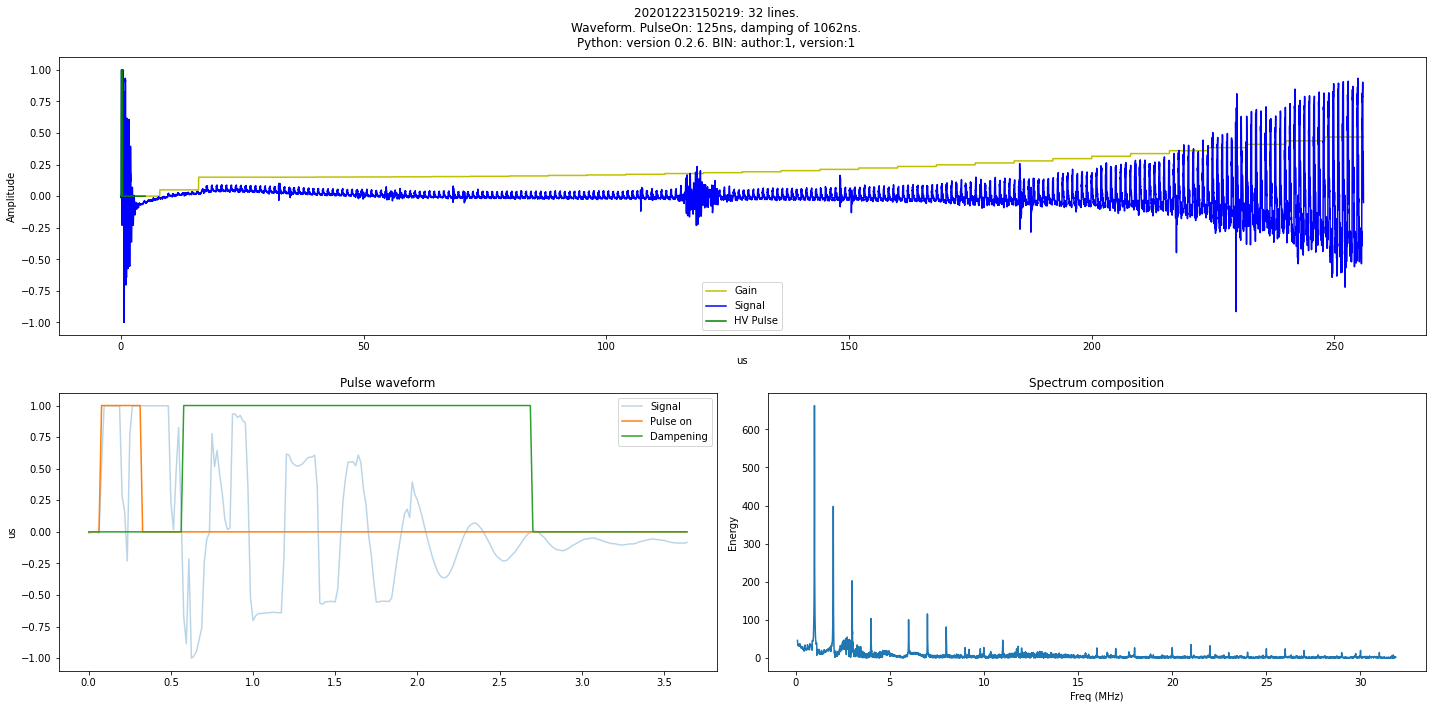

In [27]:
parallel = USB.FView() # Opens a viewing object
dataPR = parallel.readfile("parallel.npz") # plots it

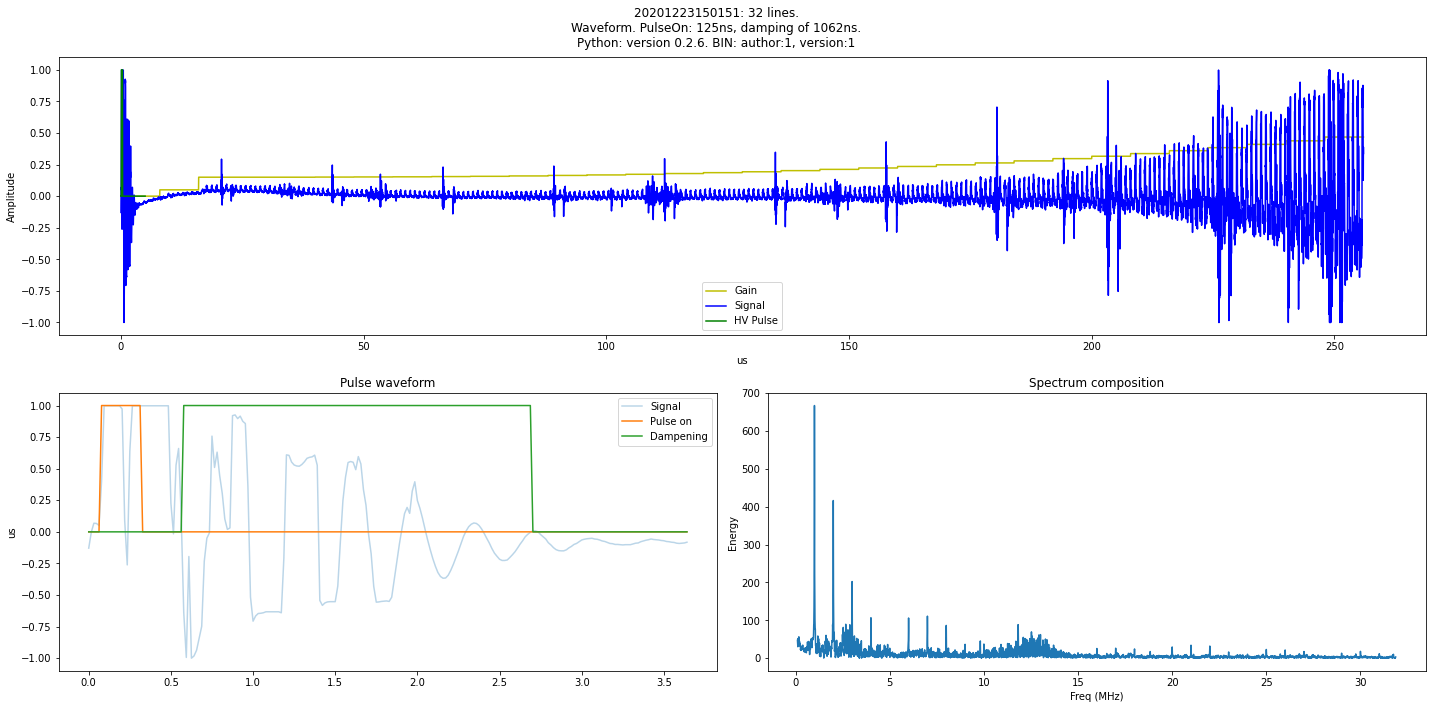

In [28]:
perp = USB.FView() # Opens a viewing object
dataPP = perp.readfile("perpendiculaire.npz") # plots it

In [32]:
fpga.disconnect()